In [26]:
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('experiments_data.csv')
df=df[['data_set', 'best_model_score_0', 'best_model_score_1', 'best_model_score_2', 'best_model_score_3', 'best_model_score_4','avg_saved_prototypes']]
df

,data_set,best_model_score_0,best_model_score_1,best_model_score_2,best_model_score_3,best_model_score_4,avg_saved_prototypes
0,rottentomatoes,0.73350,0.73949,0.73949,0.66066,0.74395,12
1,amazon,0.88249,0.87400,0.88200,0.52816,0.87550,12
2,hotel,0.74947,0.67052,0.88736,0.76606,0.67017,6
3,imdb,0.85399,0.85659,0.84600,0.86119,0.77780,12
4,rottentomatoes,0.72583,0.73199,0.61400,0.57383,0.74229,6
5,yelp,0.83083,0.83700,0.84366,0.83533,0.83147,12
6,yelp,0.59516,0.83099,0.83216,0.60900,0.58943,6
7,hotel,0.88421,0.68210,0.70736,0.74183,0.87987,12
8,amazon,0.87333,0.86883,0.88283,0.55166,0.87500,6
9,imdb,0.85079,0.68900,0.84460,0.85839,0.77420,6


In [27]:
df = pd.melt(df, id_vars=['data_set','avg_saved_prototypes'], value_vars=['best_model_score_1', 'best_model_score_2', 'best_model_score_3', 'best_model_score_4'])
df.columns = ['dataset','n', 'variable', 'acc']
df = df[['dataset','n', 'acc']]
df

,dataset,n,acc
0,rottentomatoes,12,0.73949
1,amazon,12,0.87400
2,hotel,6,0.67052
3,imdb,12,0.85659
4,rottentomatoes,6,0.73199
...,...,...,...
155,amazon,64,0.87633
156,imdb,64,0.85939
157,imdb,16,0.75800
158,imdb,4,0.79280


In [41]:
proto_df = pd.read_csv('dynamic_experiment.csv')
proto_df=proto_df[['data_set','best_model_score_0', 'best_model_score_1', 'best_model_score_2', 'best_model_score_3', 'best_model_score_4','number_of_prototypes_0','number_of_prototypes_1','number_of_prototypes_2','number_of_prototypes_3','number_of_prototypes_4']]
proto_df

,data_set,best_model_score_0,best_model_score_1,best_model_score_2,best_model_score_3,best_model_score_4,number_of_prototypes_0,number_of_prototypes_1,number_of_prototypes_2,number_of_prototypes_3,number_of_prototypes_4
0,rottentomatoes,0.60333,0.73900,0.74666,0.66049,0.74629,7,6,10,10,7
1,amazon,0.88300,0.87150,0.88066,0.88433,0.87466,8,6,13,12,10
2,imdb,0.85460,0.80260,0.85180,0.86220,0.74680,12,12,9,10,11
3,yelp,0.82766,0.84083,0.83366,0.83883,0.83463,11,11,15,5,11
4,hotel,0.89894,0.68315,0.89789,0.75237,0.89673,16,18,20,17,18


In [42]:
data = []
for id, row in proto_df.iterrows():
    for i in range(5):
        data.append((row['data_set'], row[f'best_model_score_{i}'], row[f'number_of_prototypes_{i}']))
proto_df=pd.DataFrame(data)
proto_df.columns=['dataset','acc','n']
proto_df

,dataset,acc,n
0,rottentomatoes,0.60333,7
1,rottentomatoes,0.73900,6
2,rottentomatoes,0.74666,10
3,rottentomatoes,0.66049,10
4,rottentomatoes,0.74629,7
5,amazon,0.88300,8
6,amazon,0.87150,6
7,amazon,0.88066,13
8,amazon,0.88433,12
9,amazon,0.87466,10


In [43]:
dynamic = proto_df[proto_df['dataset']=='imdb']
dynamic

,dataset,acc,n
10,imdb,0.8546,12
11,imdb,0.8026,12
12,imdb,0.8518,9
13,imdb,0.8622,10
14,imdb,0.7468,11


In [15]:
dataset = df[df['dataset']=='imdb']
dataset

,dataset,n,acc
3,imdb,12,0.85659
9,imdb,6,0.68900
20,imdb,8,0.65100
23,imdb,32,0.85500
36,imdb,64,0.84939
37,imdb,16,0.80779
38,imdb,4,0.63440
39,imdb,2,0.62080
43,imdb,12,0.84600
49,imdb,6,0.84460


In [80]:
cnn = {
    'imdb': 0.893,
    'amazon': 0.911,
    'yelp': 0.867,
    'rottentomatoes': 0.776,
    'hotel': 0.929
}


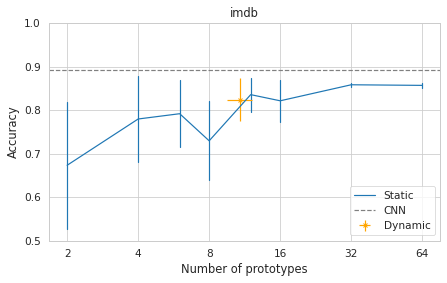

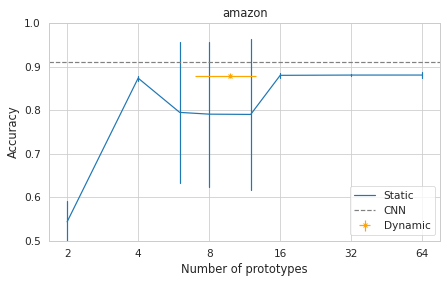

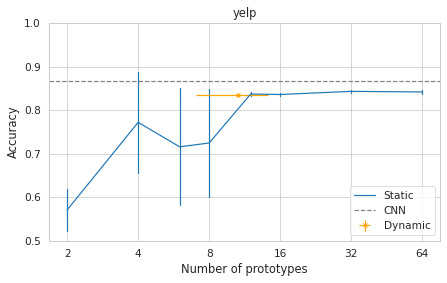

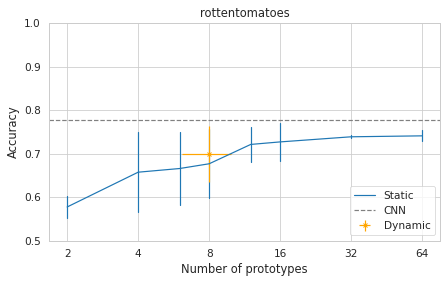

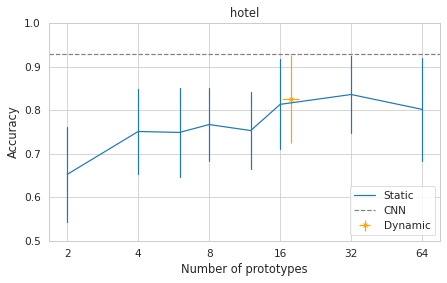

In [87]:
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.2)
pd.set_option('display.max_rows', 110)

for ds, cnn_acc in cnn.items():
    dynamic = proto_df[proto_df['dataset']==ds]
    dataset = df[df['dataset']==ds]

    plt.figure(figsize=(7,4))
    ax = sns.lineplot(x='n', y='acc', data=dataset, err_style='bars', ci='sd', label='Static')
    ax.axhline(cnn_acc, color='gray',linestyle='--', label='CNN')
    ax.errorbar([dynamic['n'].mean()], [dynamic['acc'].mean()], yerr=[dynamic['acc'].std()], xerr=[dynamic['n'].std()],fmt='x', color='orange', label='Dynamic')
    ax.set_xscale('log', base=2)
    ax.set_xticks([2, 4,8,16,32,64])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xlabel('Number of prototypes')
    ax.set_ylabel('Accuracy')
    ax.set_title(ds)
    ax.set_ylim(0.5, 1)
    ax.legend(loc='lower right')
    plt.show()
